In [6]:
import pickle
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [64]:
# Get populations

def load_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

base_dir = pathlib.Path(".").resolve().parent
my_dir = base_dir / "temp/config/0/pickles" # CHANGE HERE

paths = sorted(my_dir.iterdir(), key=lambda p: int(p.stem))
populations = [load_pickle(path).population for path in paths]

# Sanity check
for i in range(1,len(populations)):
    assert len(populations[i-1]) > max(populations[i].origins)

In [65]:
# # plot phenotypes over time
# phs = [
#     np.median(population.phenotypes, 0)
#     for population in populations
# ]
# df = pd.DataFrame(phs)

# df.T.plot(
#     legend=False,
#     cmap="copper",
#     alpha=0.5,
#     figsize=(10,5),
# )

In [51]:
# number of individuals in the pickle snapshot, number of ancestors that all snapshot individuals come from
for population in populations:
    print(len(population), len(set(population.origins)))

1134 7
1058 6
1138 6
1089 9
987 8
1075 8
1081 8
1068 6
941 7
953 6
1047 5
922 9
1077 10
1012 10
990 11
1007 11
1053 7
1047 6
1075 5
966 5
1008 10
1059 6
1056 9
1082 7
1062 4
972 8
998 8
1104 7
970 6
981 9
988 8
977 8
1001 7
1063 9
1053 7
1051 7
991 9
1089 4
988 11
915 9
1063 8
1018 10
1008 11
1057 13
1021 10
1062 11
958 8
1000 11
1046 8
1069 8
1015 8
1099 7
1067 8
922 9
1033 7
959 8
1048 5
937 6
1020 12
1009 7
1032 8
1059 10
936 10
1076 7
1006 9
1018 9
1054 9
1058 4
1004 10
1069 11
993 9
1077 3
943 10
933 7
1044 9
984 7
1042 7
1050 8
1056 8
1039 8
1079 5
1059 9
1042 10
925 10
1029 10
1064 11
936 9


In [71]:
def get_ancestors(who, gen):
    ancestors = []

    for population in populations[gen::-1]:
        who = population.origins[who]
        ancestors.insert(0, who)

    return ancestors

ancestors = {
    who: get_ancestors(who, len(populations)-1)
    for who in range(len(populations[-1]))
}

ancestors = pd.DataFrame(ancestors)

<AxesSubplot:>

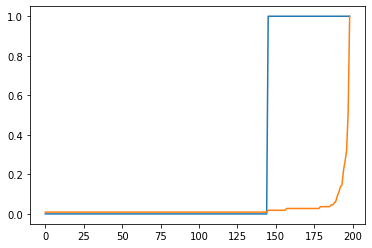

In [87]:
ancestors.nunique(1).gt(1).astype(int).plot()
ancestors.nunique(1).pipe(lambda df: df / df.max()).plot()

In [14]:
# G = nx.Graph()
# tples = [(k,v) for k,v in graph.items()]
# G.add_edges_from(tples)
# pos = nx.spring_layout(G, seed=200)
# nx.draw(G, pos, node_size=20)
# plt.show()